In [1]:
import pandas as pd
import numpy as np
import os
# import tensorflow as tf
import matplotlib.pyplot as plt

from src import data_proc, utils, feature_eng
from src import training
%load_ext autoreload
%autoreload 2

c:\Users\Aroge\anaconda3\envs\ts\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data

Each row in the laod data is a load data for a given hour

In [2]:
max_year = 2007
load_data_path = "../data/raw_data/load_hist.csv"
temp_data_path = '../data/raw_data/temp_hist.csv'

load_temp = data_proc.init_dataset(load_dir=load_data_path, temp_dir=temp_data_path, 
                       max_year=max_year)
load_temp.head(3)

,load,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t20,t21,t22,t23,t24,t25,t26,t27,t28,datetime
0,156.545,43,46,40,47,48,46,44,52,45,...,50,43,45,50,47,41,47,47,45,2005-01-01 01:00:00
1,147.924,41,46,38,46,48,45,51,50,42,...,49,43,46,47,47,45,47,47,45,2005-01-01 02:00:00
2,141.037,40,46,37,45,45,45,49,48,43,...,50,41,45,45,46,45,46,46,43,2005-01-01 03:00:00


In [16]:
import pandas as pd
def generate_hr_dates_from_days(n_days, start_date='2008-01-01'):
    """generate hourly datetime for `n_days` starting from `start_date` """

    end_date = pd.to_datetime(start_date) + pd.DateOffset(hours=n_days*24)
    dates = pd.date_range(start=start_date, end=end_date, freq='h', inclusive='left')
    return dates



DatetimeIndex(['2008-01-01 00:00:00', '2008-01-01 01:00:00',
               '2008-01-01 02:00:00', '2008-01-01 03:00:00',
               '2008-01-01 04:00:00', '2008-01-01 05:00:00',
               '2008-01-01 06:00:00', '2008-01-01 07:00:00',
               '2008-01-01 08:00:00', '2008-01-01 09:00:00',
               '2008-01-01 10:00:00', '2008-01-01 11:00:00',
               '2008-01-01 12:00:00', '2008-01-01 13:00:00',
               '2008-01-01 14:00:00', '2008-01-01 15:00:00',
               '2008-01-01 16:00:00', '2008-01-01 17:00:00',
               '2008-01-01 18:00:00', '2008-01-01 19:00:00',
               '2008-01-01 20:00:00', '2008-01-01 21:00:00',
               '2008-01-01 22:00:00', '2008-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [4]:
import sys
sys.path.append('..')
sys.path

['c:\\Users\\Aroge\\Documents\\Projects\\data science projects\\electricity-consumption-prediction-api\\notebook',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\python310.zip',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\DLLs',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\lib',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts',
 '',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\lib\\site-packages',
 'C:\\Users\\Aroge\\Documents\\Projects\\data science projects\\electricity-consumption-prediction-api',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\lib\\site-packages\\win32',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\Aroge\\anaconda3\\envs\\ts\\lib\\site-packages\\Pythonwin',
 '..',
 '..']

In [26]:
src_path = str(pathlib.Path().absolute().parent.joinpath('src'))
src_path

'c:\\Users\\Aroge\\Documents\\Projects\\data science projects\\electricity-consumption-prediction-api\\src'

In [22]:
import pathlib
str(pathlib.Path().absolute().parent)+'\src'

'c:\\Users\\Aroge\\Documents\\Projects\\data science projects\\electricity-consumption-prediction-api\\src'

In [53]:
root_dir = utils.get_proj_root()
from src.models import gam_model
model:gam_model.LinGam = utils.load_model(root_dir.joinpath('models/linear-gam-model.pkl')) 

In [55]:
pre_inf_cols = utils.load_value(root_dir.joinpath('feature_store/pre_inf_train_ft_col_names.pkl'))
featured_col_idxs = [7, 8, 9]

['t1',
 't2',
 't3',
 't5',
 't9',
 't16',
 'mean_temp',
 'hr',
 'month',
 'is_holiday',
 'is_weekend',
 'mean_temp_lag1hr',
 'mean_temp_lag2hr']

In [56]:
model.terms

s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + intercept

In [4]:
import streamlit as st

In [5]:
import pygam

In [3]:
import numpy as np
np.arange(5)

array([0, 1, 2, 3, 4])

In [4]:
import logging, sys
logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.debug('A debug message!')
logging.info('We processed %d records')

DEBUG:root:A debug message!
INFO:root:We processed %d records


# Exploratory Analysis

In [47]:
load_data_raw = load_temp[['load', 'datetime']] #.reset_index()
temp_data_pivot = load_temp.drop(labels=['load'], axis=1) #.reset_index()
load_data_raw.head(2)

,load,datetime
0,156.545,2005-01-01 01:00:00
1,147.924,2005-01-01 02:00:00


<AxesSubplot:xlabel='datetime'>

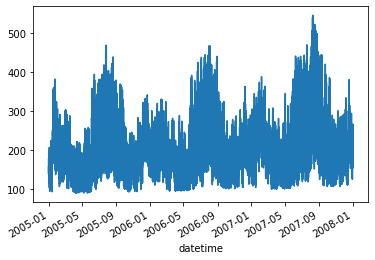

In [48]:
load_data_raw.set_index('datetime').load.plot()

<AxesSubplot:xlabel='datetime'>

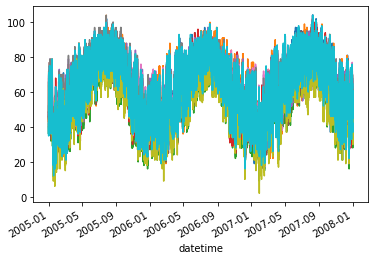

In [40]:
temp_data_pivot.set_index('datetime').iloc[:, :10].plot(legend=False)

## Demand by Time

### Demand by Month of year

<AxesSubplot:xlabel='month', ylabel='load'>

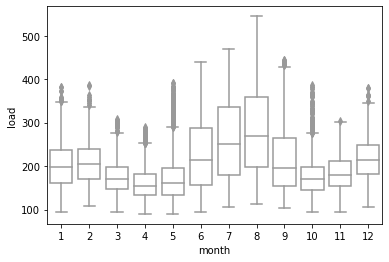

In [52]:
temp_df = (load_data_raw.copy()
           .assign(month = load_data_raw.datetime.dt.month)
           )

import seaborn as sns

sns.boxplot(x='month', y='load', data=temp_df, color='w')

### day of week

<AxesSubplot:xlabel='day_of_wk', ylabel='load'>

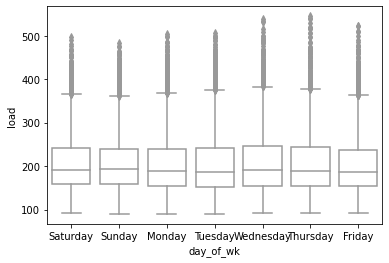

In [53]:
temp_df = (load_data_raw.copy()
           .assign(day_of_wk = load_data_raw.datetime.dt.day_name())
           )

import seaborn as sns

sns.boxplot(x='day_of_wk', y='load', data=temp_df, color='w')

### hour of day

<AxesSubplot:xlabel='hr', ylabel='load'>

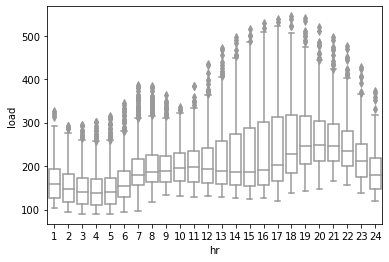

In [54]:


import seaborn as sns

sns.boxplot(x='hr', y='load', data=temp_df, color='w')

#### Weekend?

<AxesSubplot:xlabel='hr', ylabel='load'>

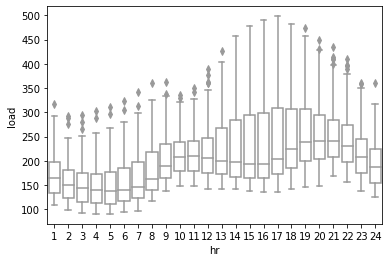

In [55]:
temp_df = (load_data_raw.copy()
           .assign(is_weekend = np.uint8(load_data_raw.datetime.dt.day_of_week > 4))
           .query('is_weekend==1'))


import seaborn as sns

sns.boxplot(x='hr', y='load', data=temp_df, color='w')

## Correlations

### load and temp

<AxesSubplot:xlabel='temp', ylabel='load'>

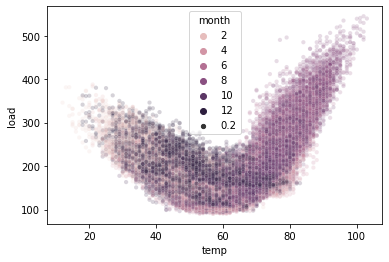

In [56]:
temp_df = (load_data_raw.copy()
           .assign(temp = temp_data_pivot.iloc[:, 4])
           .assign(month = load_data_raw.datetime.dt.month)
           )

sns.scatterplot(x='temp', y='load', data=temp_df, alpha=0.2, size=0.2, hue='month')

### Load and lags
Due to buildings’ thermal inertia, it is important to consider lagged temperatures as well as current temperatures

        date  hr     load            datetime     lag1     lag2     lag7  \
0 2005-01-01   1  156.545 2005-01-01 01:00:00      NaN      NaN      NaN   
1 2005-01-01   2  147.924 2005-01-01 02:00:00  156.545      NaN      NaN   
2 2005-01-01   3  141.037 2005-01-01 03:00:00  147.924  156.545      NaN   
3 2005-01-01   4  139.125 2005-01-01 04:00:00  141.037  147.924  156.545   
4 2005-01-01   5  140.482 2005-01-01 05:00:00  139.125  141.037  147.924   

   lag24  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


<AxesSubplot:xlabel='lag24', ylabel='load'>

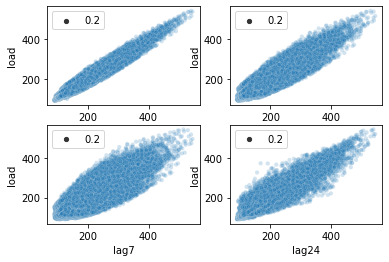

In [57]:
temp_df = (load_data_raw.copy()
           .assign(lag1=load_data_raw.load.shift(1))
           .assign(lag2=load_data_raw.load.shift(2))
           .assign(lag7=load_data_raw.load.shift(3))
           .assign(lag24=load_data_raw.load.shift(24))
           )

print(temp_df.head())

fig, axs = plt.subplots(2,2)

sns.scatterplot(x='lag1', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[0,0])
sns.scatterplot(x='lag2', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[0,1])
sns.scatterplot(x='lag7', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[1,0])
sns.scatterplot(x='lag24', y='load', data=temp_df, alpha=0.2, size=0.2, ax=axs[1,1])

### load and daylight

In [58]:
def hours_of_daylight(date, axis=23.44, latitude=35.76):
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.

temp_df = (load_data_raw.copy()
           .assign(daylight_hrs= load_data_raw.datetime.apply(hours_of_daylight)))


# sns.lineplot('daylight_hrs', data=temp_df)

C:\Users\Aroge\AppData\Local\Temp\ipykernel_38920\3419474934.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  diff = date - pd.datetime(2000, 12, 21)


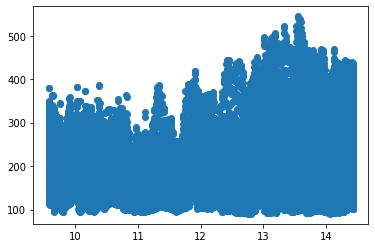

In [59]:
plt.scatter(temp_df.daylight_hrs, temp_df.load)

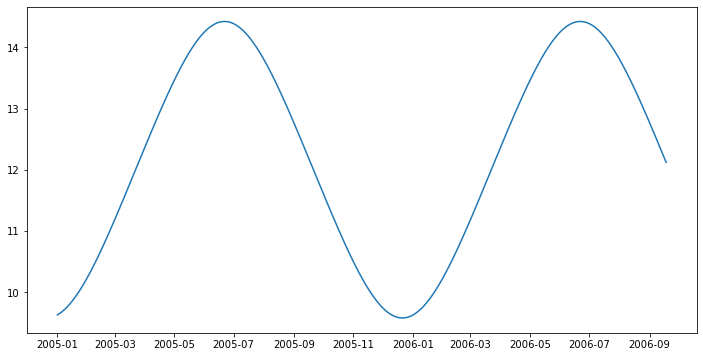

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(temp_df.datetime[:15000], temp_df.daylight_hrs[:15000])

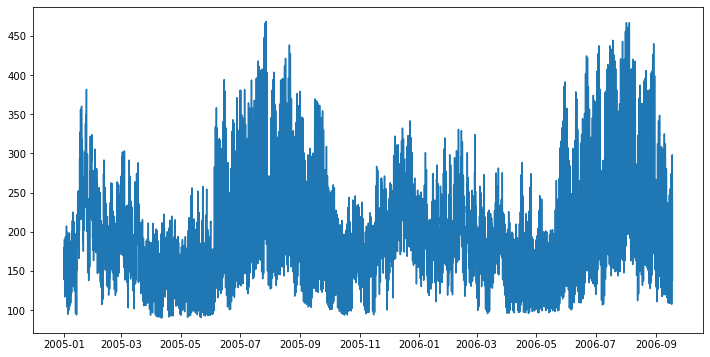

In [61]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(temp_df.datetime[:15000], temp_df.load[:15000])

# Feature Engineering

# Modelling

## GAM

In [ ]:
from src import inference as inf
root_dir = utils.get_proj_root()

In [150]:
future_temp_data = data_proc.get_raw_temp_data(
    root_dir.joinpath('data/raw_data/temp_hist.csv'), training=False)
future_temp_data = future_temp_data[future_temp_data['date'] >='2008']

future_dates = future_temp_data.date + pd.to_timedelta(future_temp_data.hr, unit='h')
future_dates = future_dates.values
future_temps = future_temp_data.iloc[:, 2:].values

inf_df = inf.init_df(future_dates, future_temps)
inf_df = feature_eng.make_featured_data(inf_df, training=False, drop_temp_cols=False)
inf_df = inf.order_inf_data_cols(inf_df)

model = utils.load_value(root_dir.joinpath('models/linear_gam_model.pkl'))

pred_data= inf.get_predictions(inf_df, model)

['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month', 'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr']


In [148]:
# start_date = '2008-01-01'
# future_dates = pd.date_range(start=start_date, end='2008-12-31', freq='h', inclusive='left')+ pd.DateOffset(hours=1)

# inf_df = inf.init_df(future_dates)
# inf_df = feature_eng.make_featured_data(inf_df, training=False, drop_temp_cols=False)
# inf_df = inf.order_inf_data_cols(inf_df)
# inf_df.head()

# model = utils.load_value(root_dir.joinpath('models/linear_gam_model.pkl'))

# pred_data= inf.get_predictions(inf_df, model)

['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month', 'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr']


<AxesSubplot:xlabel='datetime'>

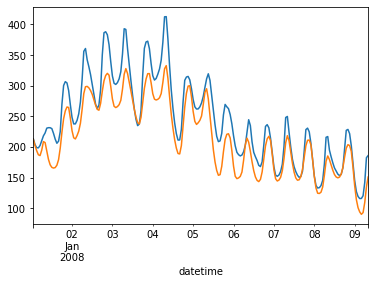

In [151]:
actual_vals = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])
actual_vals['datetime'] = actual_vals.Date + pd.to_timedelta(actual_vals.Hour, unit='h')
actual_vals.set_index('datetime', inplace=True)
actual_vals.Load[:200].plot()
pred_data.load[:200].plot()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_true=actual_vals.Load, y_pred=pred_data.load)

In [27]:
from src.models.gam_model import LinGam
from src.training import split_dataset

gam_model = LinGam()

X_train, X_test, y_train, y_test = split_dataset(input_df=input_df)
gam_model.train(X=X_train, y=y_train)

n_ft = X_train.shape[-1]
fig, axs = plt.subplots(1, n_ft, figsize=(8*(n_ft/2), 5))

root_dir = utils.get_proj_root()
ft_list = utils.load_value(root_dir.joinpath('feature_store/train_ft_col_names.pkl'))
ft_list.remove()

for i, term in enumerate(gam_model.model.terms):

    if term.isintercept:
        continue
    try:
        ax = axs[i]
    except TypeError:
        ax = ax
    XX = gam_model.model.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam_model.model.partial_dependence(term=i, X=XX), label=str(i))
    ax.plot(XX[:, i], gam_model.model.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_title(ft_list[i])
plt.legend()
print(n_ft)

NameError: name 'input_df' is not defined

0.027733965918741974

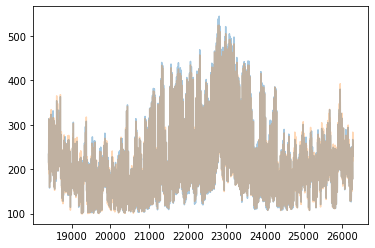

In [34]:
y_hat = gam_model.predict(X_test)

date_series = load_temp.index
split_pt = X_train.shape[0]
date_series_test = date_series[split_pt:]


fig, ax = plt.subplots()

ax.plot(date_series_test, y_test, alpha=0.4, label='actual')
ax.plot(date_series_test, y_hat, alpha=0.3, label='pred')

from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_true=y_test, y_pred=y_hat)

0.11078859707800476

## DNN

- how about non-continuous variables

type

In [67]:
history.history['val_mae'][-1]

0.03330095484852791

In [308]:
ft_list = load_temp.columns.to_list()
ft_list.remove('load')
ft_list = ft_list + ['load']
print(ft_list)

date_series = load_temp.index.values
input_data = load_temp[ft_list].values


from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1)).fit(input_data)
input_data = scaler.transform(input_data)
input_data[0]
print(input_data.shape)

['hr', 1, 2, 3, 5, 9, 16, 'mean_temp', 'month', 'isweekend', 'is_holiday', 'temp_s1', 'temp_s2', 'load_s1', 'load_s2', 'load']
(26277, 16)


In [309]:
def train_val_split(time, series, split_time):

    time_train = time[:split_time]
    series_train = series[:split_time]
    time_valid = time[split_time:]
    series_valid = series[split_time:]

    return time_train, series_train, time_valid, series_valid

In [310]:
from sklearn.model_selection import train_test_split

date_train, date_test, series_train, series_test =  train_test_split(date_series, input_data, 
                                                                     test_size=0.3, shuffle=False)


In [311]:
split_pt = series_train.shape[0]

In [312]:
def window_dataset(data, window_size, batch_size, shuffle_buffer_size):

    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(size=window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(map_func=lambda x: x.batch(window_size+1))
    # ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.map(map_func=lambda x: (x[:-1], x[-1,-1]))
    ds = ds.batch(batch_size=batch_size).prefetch(1)
    return ds

window_size = 32
shuffle_buffer_sz = int(len(input_data) * 0.5)
batch_size = 32

train_set = window_dataset(series_train, window_size, batch_size, shuffle_buffer_sz)
val_set = window_dataset(series_test, window_size, batch_size, shuffle_buffer_sz)

# Model Architecture

In [313]:
def create_uncompiled_model():

    ### START CODE HERE

    input_shape = [window_size, series_train.shape[-1]]
    
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv1D(filters=64, kernel_size=12,
                          strides=1,
                          activation="relu",
                          padding='causal',
                          input_shape=input_shape),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(32),
      tf.keras.layers.Dense(32, activation="relu"),
      tf.keras.layers.Dense(16, activation="relu"),
      tf.keras.layers.Dense(8, activation="relu"),
      tf.keras.layers.Dense(1),
    ])

    ### END CODE HERE

    return model

In [314]:
uncompiled_model = create_uncompiled_model()

# Get one batch of the training set(X = input, y = label)
for X, y in train_set.take(1):
    
    # Generate a prediction
    print(f'Testing model prediction with input of shape {X.shape}...')
    y_pred = uncompiled_model.predict(X)
    
# Compare the shape of the prediction and the label y (remove dimensions of size 1)
y_pred_shape = y_pred.squeeze().shape

assert y_pred_shape == y.shape, (f'Squeezed predicted y shape = {y_pred_shape} '
                                           f'whereas actual y shape = {y.shape}.')

print("Your current architecture is compatible with the windowed dataset! :)")

Testing model prediction with input of shape (32, 32, 16)...
1/1 [==============================] - 8s 8s/step
Your current architecture is compatible with the windowed dataset! :)


In [315]:
def adjust_learning_rate(dataset):
    
    model = create_uncompiled_model()
    
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-5 * 10**(epoch / 20))
    
    ### START CODE HERE
    
    # Select your optimizer
    # optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    optimizer = tf.keras.optimizers.Adam()

    
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer, 
                  metrics=["mae"]) 
    
    ### END CODE HERE
    
    history = model.fit(dataset, epochs=50, callbacks=[lr_schedule])
    
    return history

# Run the training with dynamic LR
lr_history = adjust_learning_rate(train_set)

Epoch 1/50
574/574 [==============================] - 13s 13ms/step - loss: 0.0121 - mae: 0.1200 - lr: 1.0000e-05
Epoch 2/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0099 - mae: 0.1109 - lr: 1.1220e-05
Epoch 3/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0077 - mae: 0.0978 - lr: 1.2589e-05
Epoch 4/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0060 - mae: 0.0871 - lr: 1.4125e-05
Epoch 5/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0047 - mae: 0.0777 - lr: 1.5849e-05
Epoch 6/50
574/574 [==============================] - 8s 15ms/step - loss: 0.0038 - mae: 0.0698 - lr: 1.7783e-05
Epoch 7/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0035 - mae: 0.0659 - lr: 1.9953e-05
Epoch 8/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0033 - mae: 0.0642 - lr: 2.2387e-05
Epoch 9/50
574/574 [==============================] - 8s 14ms/step - loss: 0.0032 - mae: 0.0629

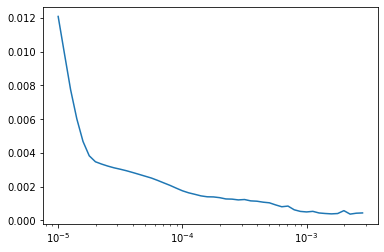

In [316]:
import matplotlib.pyplot as plt
plt.semilogx(lr_history.history["lr"], lr_history.history["loss"])

## Compile Model

In [317]:
def create_model():

    
    model = create_uncompiled_model()

    ### START CODE HERE
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
    
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=["mae"])  
    

    ### END CODE HERE

    return model

# Save an instance of the model
model = create_model()

es_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

# Train it
history = model.fit(train_set, validation_data=val_set, epochs=100, callbacks=[es_callback])
# history = model.fit(train_set, validation_data=val_set, epochs=10)

Epoch 1/100
574/574 [==============================] - 15s 20ms/step - loss: 0.0093 - mae: 0.1058 - val_loss: 0.0156 - val_mae: 0.1424
Epoch 2/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0071 - mae: 0.0933 - val_loss: 0.0145 - val_mae: 0.1197
Epoch 3/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0041 - mae: 0.0713 - val_loss: 0.0119 - val_mae: 0.1099
Epoch 4/100
574/574 [==============================] - 10s 17ms/step - loss: 0.0034 - mae: 0.0647 - val_loss: 0.0078 - val_mae: 0.0921
Epoch 5/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0031 - mae: 0.0613 - val_loss: 0.0061 - val_mae: 0.0823
Epoch 6/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0027 - mae: 0.0572 - val_loss: 0.0050 - val_mae: 0.0746
Epoch 7/100
574/574 [==============================] - 10s 18ms/step - loss: 0.0024 - mae: 0.0539 - val_loss: 0.0043 - val_mae: 0.0693
Epoch 8/100
574/574 [==============================] - 

# Model Evaluation

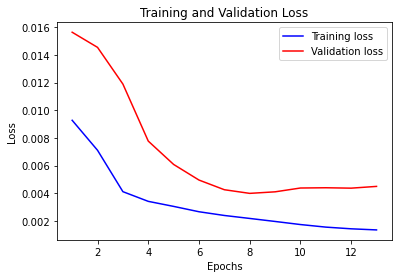

In [327]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = np.arange(len(loss)) + 1
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

In [205]:
lstm_model_0_dir =  '../models/lstm_model_0'
model.save(lstm_model_0_dir)


INFO:tensorflow:Assets written to: ../models/lstm_model_0\assets


INFO:tensorflow:Assets written to: ../models/lstm_model_0\assets


# DNN Model prediction

In [45]:
# TODO: the parameters must be saved upon initialization 
# in training if inference would be calling like this
from src.training import DNNParams, get_train_data, GTrainParams
from src import utils
import dataclasses
from src.inference import get_input, order_inf_data_cols
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:

root_dir = utils.get_proj_root()
dnn_train_params = utils.load_value(fname=root_dir.joinpath('models/train_params_dnn.pkl'))
dnn_train_params = DNNParams(**dnn_train_params)
window_size = dnn_train_params.window_size
inf_df = get_input()

station_id       date  hr  t1  t2  t3  t4  t5  t6  t7  t8  ...  t19  t20  t21  \
26280      2008-01-01   1  46  36  33  40  41  47  36  40  ...   43   49   32   
26281      2008-01-01   2  45  36  31  36  41  46  37  39  ...   39   47   30   
26282      2008-01-01   3  43  36  30  38  41  42  37  39  ...   41   46   30   
26283      2008-01-01   4  34  36  31  38  41  37  38  38  ...   39   46   28   
26284      2008-01-01   5  39  37  31  37  43  37  37  38  ...   36   47   30   
...               ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   
35059      2008-12-31  20  37  37  31  36  43  37  40  42  ...   34   42   32   
35060      2008-12-31  21  34  36  29  34  41  36  38  40  ...   34   40   28   
35061      2008-12-31  22  34  36  28  33  39  35  36  38  ...   28   38   30   
35062      2008-12-31  23  32  32  27  32  36  32  35  35  ...   27   37   30   
35063      2008-12-31  24  28  32  26  27  36  31  33  33  ...   26   35   29   

station_id  t22  t23  t24  

In [86]:
def get_past_n_rows_pre_inf_ft(n, return_load=True):

    hist_data = get_train_data(GTrainParams.train_data_path)
    hist_data = hist_data.iloc[-n:, :]
    load = hist_data['load'].values
    hist_data.drop(labels='load', inplace=True, axis=1)
    # hist_data = order_inf_data_cols(hist_data)
    
    if return_load:
        hist_data['load'] = load

    return hist_data

init_window_data = get_past_n_rows_pre_inf_ft(n=window_size, return_load=False)


In [87]:
print(inf_df.columns)
print(init_window_data.columns)
print(inf_df.shape)

Index(['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month',
       'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr'],
      dtype='object')
Index(['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month',
       'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr',
       'load_lag1hr', 'load_lag2hr'],
      dtype='object')
(8784, 13)


In [49]:
inf_time_ft =  list(set(init_window_data.columns) - set(inf_df.columns))
inf_df[inf_time_ft] = np.zeros(shape=(len(inf_df), len(inf_time_ft)))

In [50]:
init_window_data.head(3)

,t1,t2,t3,t5,t9,t16,mean_temp,hr,month,is_holiday,is_weekend,mean_temp_lag1hr,mean_temp_lag2hr,load_lag1hr,load_lag2hr
datetime,,,,,,,,,,,,,,,
2007-12-30 17:00:00,55,52,46,64,43,60,51.863636,17,12,0,1,52.636364,53.409091,209.227,207.983
2007-12-30 18:00:00,55,48,47,64,45,59,51.454545,18,12,0,1,51.863636,52.636364,216.772,209.227
2007-12-30 19:00:00,55,48,46,63,45,60,51.590909,19,12,0,1,51.454545,51.863636,241.026,216.772


In [102]:
print(inf_df.shape)
print(inf_df.columns)
inf_df.head(3)

(8784, 13)
Index(['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month',
       'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr'],
      dtype='object')


,t1,t2,t3,t5,t9,t16,mean_temp,hr,month,is_holiday,is_weekend,mean_temp_lag1hr,mean_temp_lag2hr
datetime,,,,,,,,,,,,,
2008-01-01 01:00:00,46.0,36.0,33.0,41.0,39.0,47.0,40.090909,1,1,0,0,40.090909,40.090909
2008-01-01 02:00:00,45.0,36.0,31.0,41.0,44.0,46.0,38.818182,2,1,0,0,40.090909,40.090909
2008-01-01 03:00:00,43.0,36.0,30.0,41.0,46.0,42.0,38.954545,3,1,0,0,38.818182,40.090909


In [93]:
print(inf_df.shape, init_window_data.shape)

(8784, 13) (32, 15)


In [98]:
root_dir = utils.get_proj_root()
past_data_path = root_dir.joinpath('data/processed/training.csv')
past_data = pd.read_csv(past_data_path, parse_dates=[0], index_col=0)

In [66]:
def reverse_scale_pred(pred):

    _, y_scaler = utils.load_value(root_dir.joinpath('models/norm_Xy_scaler.pkl'))
    inv_scaled_value = y_scaler.inverse_transform(np.array(pred).reshape(-1, 1))

    return inv_scaled_value.squeeze()


In [125]:
print(init_window_data.columns)
print(inf_df.columns)

Index(['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month',
       'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr',
       'load_lag1hr', 'load_lag2hr'],
      dtype='object')
Index(['t1', 't2', 't3', 't5', 't9', 't16', 'mean_temp', 'hr', 'month',
       'is_holiday', 'is_weekend', 'mean_temp_lag1hr', 'mean_temp_lag2hr'],
      dtype='object')


In [151]:
from src.inference import get_hr_ft
from src.models.dnn import get_scaler

def get_dnn_predictions(inf_df:pd.DataFrame, model):

    init_window_data = get_past_n_rows_pre_inf_ft(n=window_size-1, return_load=False)
    # inf_time_ft =  list(set(init_window_data.columns) - set(inf_df.columns))

    # create dummy load columns for future df
    # inf_df[inf_time_ft] = np.zeros(shape=(len(inf_df), len(inf_time_ft)))

    
    # get inf features
    inf_df_with_past = pd.concat(objs=(init_window_data, inf_df), axis=0)

    # input_X = np.concatenate((init_window_data.values, inf_df.values))
    
    # prediction dataframe
    pred_data = pd.DataFrame({'datetime':inf_df.index.values,
                          'load':pd.NA})
    pred_data.set_index('datetime', inplace=True)

    for i in range(len(pred_data)):
        
        
        # if i != 0:
        # fix inference time features
        curr_datetime = inf_df.index[i]
        prev_1hr = curr_datetime + pd.DateOffset(hours=-1)
        prev_2hr = curr_datetime + pd.DateOffset(hours=-2)
        load_prev_1h = get_hr_ft(prev_1hr, 'load', pred_data=pred_data, past_data=past_data)
        load_prev_2h = get_hr_ft(prev_2hr, 'load', pred_data=pred_data, past_data=past_data)
        
        inf_df_with_past.loc[curr_datetime, 'load_lag1hr'] = load_prev_1h
        inf_df_with_past.loc[curr_datetime, 'load_lag2hr'] = load_prev_2h 
        # print(load_prev_1h, load_prev_2h)

        input_w = inf_df_with_past[i:window_size+i].values

        # try:
        #     assert np.isnan(input_w).sum() == 0
        # except AssertionError:
        #     print(load_prev_1h, load_prev_2h)
        #     print(input_w[-1])
            

        # scale input
        X_scaler, y_scaler = get_scaler()
        input_w = X_scaler.transform(input_w)
        # reshape to batch 1
        input_w = np.reshape(input_w, newshape=(1, input_w.shape[0], input_w.shape[1]))
        pred = model(input_w).numpy().squeeze()

        # rescale output
        pred = y_scaler.inverse_transform(np.array(pred).reshape(-1, 1)).squeeze()
        # print('pred', pred)
        # if np.isnan(pred):
        #     print(np.isnan(input_w).sum())
        #     break
        pred_data.iloc[i] = pred


    return pred_data



n = -1
model= utils.load_model(fname=root_dir.joinpath('models/dnn'))
date_preds_df = get_dnn_predictions(inf_df[:n], model=model)



Model: "dnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             multiple                  11584     
                                                                 
 lstm (LSTM)                 multiple                  33024     
                                                                 
 lstm_1 (LSTM)               multiple                  33024     
                                                                 
 lstm_2 (LSTM)               multiple                  12416     
                                                                 
 dense (Dense)               multiple                  1056      
                                                                 
 dense_1 (Dense)             multiple                  528       
                                                                 
 dense_2 (Dense)             multiple                  136     

<AxesSubplot:xlabel='datetime'>

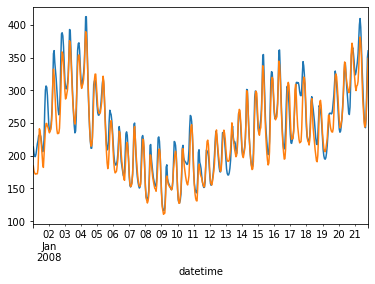

In [146]:
n=500
actual_vals = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])
actual_vals['datetime'] = actual_vals.Date + pd.to_timedelta(actual_vals.Hour, unit='h')
actual_vals.set_index('datetime', inplace=True)
actual_vals.Load[:n].plot()
date_preds_df.load[:n].plot()

<AxesSubplot:xlabel='datetime'>

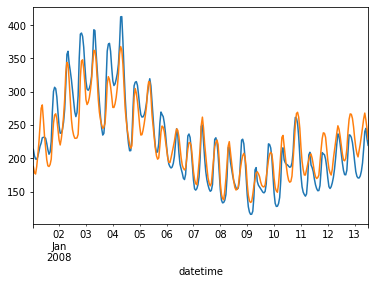

In [152]:
n=300
actual_vals = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])
actual_vals['datetime'] = actual_vals.Date + pd.to_timedelta(actual_vals.Hour, unit='h')
actual_vals.set_index('datetime', inplace=True)
actual_vals.Load[:n].plot()
date_preds_df.load[:n].plot()

In [140]:
date_preds_df

,load
datetime,
2008-01-01 01:00:00,183.07074
2008-01-01 02:00:00,173.603668
2008-01-01 03:00:00,169.064819
2008-01-01 04:00:00,172.096893
2008-01-01 05:00:00,181.674423
...,...
2008-12-31 19:00:00,230.119049
2008-12-31 20:00:00,240.435867
2008-12-31 21:00:00,240.988174


In [8]:
train_params = DNNParams(lr=1e-2)
train_params_dict = dataclasses.asdict(train_params)
print(train_params_dict)
DNNParams(**train_params_dict)

{'lr': 0.01, 'batch_size': 32, 'window_size': 32, 'n_epochs': 3, 'optimizer': 'adam', 'loss': 'huber', 'early_stop': False}


DNNParams(lr=0.01, batch_size=32, window_size=32, n_epochs=3, optimizer='adam', loss='huber', early_stop=False)

In [319]:
def compute_metrics(true_series, forecast):
    
    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()
    mape = tf.keras.metrics.MeanAbsolutePercentageError(true_series, forecast).numpy()

    return mse, mae, mape

def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(batch_size).prefetch(1)
    forecast = model.predict(ds)
    return forecast, ds

In [222]:
input_data.shape, date_train.shape, series_train.shape, forecast.shape

((26277, 30), (18393,), (18393, 30), (26246,))

In [214]:
series_test.shape

(7884, 30)

In [320]:


forecast, ds = model_forecast(model, input_data, window_size)
forecast = forecast.squeeze()

821/821 [==============================] - 7s 7ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


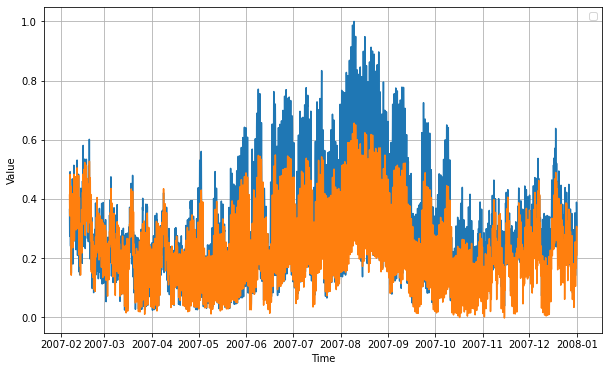

In [321]:
plt.figure(figsize=(10, 6))

def plot_series(time, series, label=None, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()

plot_series(date_test, series_test[:,-1])
plot_series(date_test, forecast[split_pt-window_size:-1])

In [322]:
forecast, ds = model_forecast(model, input_data[split_pt-window_size:], window_size)
forecast = forecast.squeeze()
print(forecast.shape)

247/247 [==============================] - 2s 7ms/step
(7885,)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


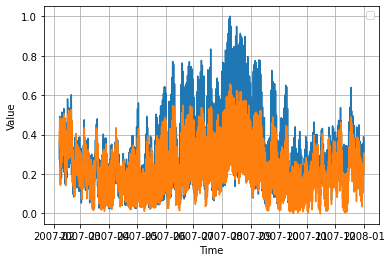

In [323]:
plot_series(date_test, series_test[:,-1])
plot_series(date_test, forecast[:-1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


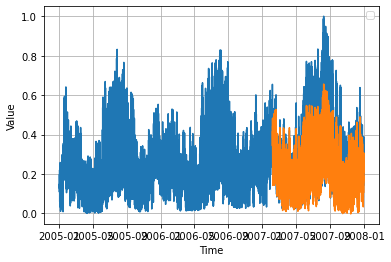

In [324]:
plot_series(date_series, input_data[:,-1])
plot_series(date_test, forecast[:-1])

## multi-output

In [330]:


temp_data_future  = pd.read_csv(temp_data_path, parse_dates=[0])
temp_data_future = temp_data_future[temp_data_future.Date >= '2008']

temp_data_future.columns = ['date', 'hr', 'station_id', 'temperature']
temp_data_future['datetime'] = temp_data_future.date + pd.to_timedelta(temp_data_future.hr, unit='h')

temp_data_future_pivot = pd.pivot_table(temp_data_future, values='temperature', index=['date', 'hr','datetime'], columns='station_id')
temp_data_future_pivot.reset_index(inplace=True)

temp_data_future_pivot.drop(['date', 'hr'], axis=1, inplace=True)
print(temp_data_future_pivot.shape)

holidays = cal.holidays(start=temp_data_future_pivot.datetime.min(), end=temp_data_future_pivot.datetime.max())
temp_data_future_pivot['is_holiday'] = np.int16(temp_data_future_pivot.datetime.dt.date.isin(holidays))
temp_data_future_pivot.set_index(keys='datetime', inplace=True)

feature_list_f = list(np.arange(1, n_stations+1)) + ['is_holiday']
date_series_f = temp_data_future_pivot.index.values
input_data_f = temp_data_future_pivot[feature_list_f].values

scaler = MinMaxScaler(feature_range=(0,1)).fit(input_data_f)
input_data_f = scaler.transform(input_data_f)

future_len = len(input_data_f)

input_data_f = np.concatenate((input_data_f, np.zeros(shape=(future_len, 1)) ), axis=1)

temp_data_future_pivot.head(2)

(8783, 29)


c:\Users\Aroge\anaconda3\envs\t-series-tf\lib\site-packages\pandas\core\algorithms.py:521: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  return f(comps, values)


station_id,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,is_holiday
datetime,,,,,,,,,,,,,,,,,,,,,
2008-01-01 01:00:00,46.0,36.0,33.0,40.0,41.0,47.0,36.0,40.0,39.0,39.0,...,49.0,32.0,37.0,37.0,43.0,37.0,37.0,45.0,34.0,0
2008-01-01 02:00:00,45.0,36.0,31.0,36.0,41.0,46.0,37.0,39.0,44.0,35.0,...,47.0,30.0,36.0,39.0,42.0,37.0,36.0,42.0,35.0,0


In [331]:
print(input_data_f.shape)
input_data_f[:2]

(8783, 30)


array([[0.37209302, 0.24096386, 0.28571429, 0.29761905, 0.28395062,
        0.37349398, 0.24096386, 0.28915663, 0.40909091, 0.27058824,
        0.28395062, 0.25      , 0.34146341, 0.32941176, 0.29761905,
        0.31343284, 0.30487805, 0.30120482, 0.35632184, 0.3880597 ,
        0.26136364, 0.27710843, 0.26829268, 0.28205128, 0.25      ,
        0.26436782, 0.3373494 , 0.21428571, 0.        , 0.        ],
       [0.36046512, 0.24096386, 0.26190476, 0.25      , 0.28395062,
        0.36144578, 0.25301205, 0.27710843, 0.46590909, 0.22352941,
        0.2962963 , 0.225     , 0.34146341, 0.27058824, 0.27380952,
        0.29850746, 0.29268293, 0.31325301, 0.31034483, 0.35820896,
        0.23863636, 0.26506024, 0.29268293, 0.26923077, 0.25      ,
        0.25287356, 0.30120482, 0.22619048, 0.        , 0.        ]])

In [293]:
input_data.shape, temp_data_future_pivot.shape

((26277, 30), (8783, 29))

In [307]:

# input_X = input_data[-window_size:, :]

# input_X = np.reshape(input_X, newshape=(1, input_X.shape[0], input_X.shape[1]))
# print(model(input_X).numpy().squeeze())

pred_s = []

input_X_series = np.concatenate((input_data[-window_size:, :], input_data_f), axis=0)

pred_out_sz = input_data_f.shape[0]

for i in range(pred_out_sz):

    input_w = input_X_series[i:window_size+i]

    # put in last prediction in features for subsequent predictions
    # first prediction has the right inputs
    if i != 0:
        input_w[-1, -1] = pred_s[-1]
    
    input_w = np.reshape(input_w, newshape=(1, input_w.shape[0], input_w.shape[1]))
    # print(model(input_X))
    pred = model(input_w).numpy().squeeze()

    pred_s.append(pred)

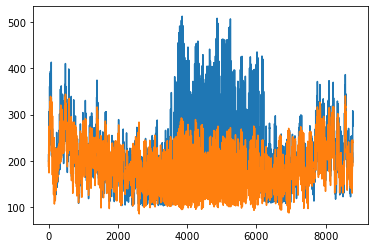

In [360]:
soln_data = pd.read_csv('../data/eval_data/Solution.csv', parse_dates=[0])

soln_data['datetime'] = soln_data.Date + pd.to_timedelta(soln_data.Hour, unit='h')
soln_data.datetime.value_counts()


load_temp_f = input_data_f.copy()
load_temp_f[:, -1] = np.array(pred_s)
load_temp_f = scaler.inverse_transform(load_temp_f)

plt.plot(soln_data.Load)
plt.plot(load_temp_f[:, -1])

In [326]:
soln_data.shape, temp_data_future_pivot.shape

((8784, 4), (8783, 29))

In [328]:
temp_data_future_pivot.index.value_counts()

2008-01-01 01:00:00    1
2008-09-01 04:00:00    1
2008-08-31 22:00:00    1
2008-08-31 23:00:00    1
2008-09-01 00:00:00    1
                      ..
2008-05-01 19:00:00    1
2008-05-01 18:00:00    1
2008-05-01 17:00:00    1
2008-05-01 16:00:00    1
2009-01-01 00:00:00    1
Name: datetime, Length: 8783, dtype: int64

In [321]:
temp_data_future.datetime.value_counts()

2008-11-02 02:00:00    56
2008-01-01 01:00:00    28
2008-09-01 04:00:00    28
2008-08-31 22:00:00    28
2008-08-31 23:00:00    28
                       ..
2008-05-01 19:00:00    28
2008-05-01 18:00:00    28
2008-05-01 17:00:00    28
2008-05-01 16:00:00    28
2009-01-01 00:00:00    28
Name: datetime, Length: 8783, dtype: int64

In [322]:
temp_data_raw.datetime.value_counts()

2006-10-29 02:00:00    56
2007-11-04 02:00:00    56
2005-10-30 02:00:00    56
2005-01-01 01:00:00    28
2006-12-31 21:00:00    28
                       ..
2005-12-31 23:00:00    28
2005-12-31 22:00:00    28
2005-12-31 21:00:00    28
2005-12-31 20:00:00    28
2008-01-01 00:00:00    28
Name: datetime, Length: 26277, dtype: int64

In [330]:
temp_data_pivot.datetime.value_counts()

2005-01-01 01:00:00    1
2006-12-31 21:00:00    1
2007-01-01 07:00:00    1
2007-01-01 06:00:00    1
2007-01-01 05:00:00    1
                      ..
2005-12-31 23:00:00    1
2005-12-31 22:00:00    1
2005-12-31 21:00:00    1
2005-12-31 20:00:00    1
2008-01-01 00:00:00    1
Name: datetime, Length: 26277, dtype: int64

In [333]:
a = temp_data_raw[0]
temp_data_pivot = pd.pivot_table(temp_data_raw, values='temperature', index=['date', 'hr','datetime'], columns='station_id')
temp_data_pivot.head()

station_id                           1     2     3     4     5     6     7   \
date       hr datetime                                                        
2005-01-01 1  2005-01-01 01:00:00  43.0  46.0  40.0  47.0  48.0  46.0  44.0   
           2  2005-01-01 02:00:00  41.0  46.0  38.0  46.0  48.0  45.0  51.0   
           3  2005-01-01 03:00:00  40.0  46.0  37.0  45.0  45.0  45.0  49.0   
           4  2005-01-01 04:00:00  39.0  46.0  37.0  47.0  48.0  48.0  45.0   
           5  2005-01-01 05:00:00  38.0  46.0  37.0  44.0  48.0  49.0  43.0   

station_id                           8     9     10  ...    19    20    21  \
date       hr datetime                               ...                     
2005-01-01 1  2005-01-01 01:00:00  52.0  45.0  42.0  ...  39.0  50.0  43.0   
           2  2005-01-01 02:00:00  50.0  42.0  41.0  ...  41.0  49.0  43.0   
           3  2005-01-01 03:00:00  48.0  43.0  40.0  ...  43.0  50.0  41.0   
           4  2005-01-01 04:00:00  50.0  42.0  39.0  ...  43.0  49.0  41.0   
           5  2005-01-01 05:00:00  50.0  42.0  38.0  ...  43.0  49.0  39.0   

station_id                           22    23    24    25    26    27    28  
date       hr datetime                                                       
2005-01-01 1  2005-01-01 01:00:00  45.0  50.0  47.0  41.0  47.0  47.0  45.0  
           2  2005-01-01 02:00:00  46.0  47.0  47.0  45.0  47.0  47.0  45.0  
           3  2005-01-01 03:00:00  45.0  45.0  46.0  45.0  46.0  46.0  43.0  
           4  2005-01-01 04:00:00  43.0  45.0  44.0  45.0  47.0  47.0  44.0  
           5  2005-01-01 05:00:00  43.0  43.0  45.0  45.0  47.0  46.0  44.0  

[5 rows x 28 columns]

In [342]:
np.array(pred_s).reshape((-1, 1))

array([[0.24131413],
       [0.21474975],
       [0.21383303],
       ...,
       [0.33004126],
       [0.33115205],
       [0.3399243 ]], dtype=float32)

In [356]:
load_temp_f.shape, input_data_f.shape

((8783, 31), (8783, 30))

In [358]:
load_temp_f = input_data_f.copy()
load_temp_f[:, -1] = np.array(pred_s)
load_temp_f = scaler.inverse_transform(load_temp_f)

plt.plot(soln_data.Load)
plt.plot(load_temp_f[:, -1])